<a href="https://colab.research.google.com/github/JoaoRacedo/Datos2_2023_10/blob/main/Graph_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random as rnd
import numpy as np
import seaborn as sns
import pprint
import networkx as nx
import matplotlib.pyplot as plt

# 1.

In [ ]:
rnd.seed(3)
M = np.zeros((10, 10))
for i in range(10):
  for j in range(10):
    M[i,j] = rnd.randint(0,1)

In [ ]:
pprint.pprint(M)

array([[0., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 1., 1., 1., 1., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 0., 1., 1., 0., 1., 0.],
       [1., 0., 0., 1., 1., 1., 0., 0., 0., 1.],
       [1., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 1., 1., 1., 0., 1.],
       [1., 1., 1., 0., 1., 1., 0., 1., 1., 1.]])


<AxesSubplot:>

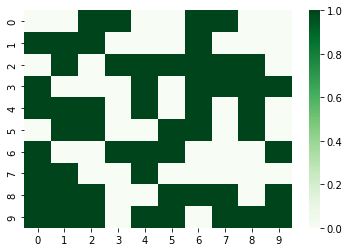

In [ ]:
sns.heatmap(M, cmap='Greens')

## Diseñe un algoritmo que permita contar el número de islas:

1. Se considera isla a un grupo (clúster) de unos bajo la condición (←, →, ⇑, ↓)
2. Una isla puede ser un solo elemento
3. Puede asumir que los extremos estan rodeados de agua

Inserte todas las celdas de código que considere necesarias

# 2.

In [ ]:
rnd.seed(10)
M = np.zeros((5, 5))
for i in range(5):
  for j in range(5):
    M[i,j] = rnd.randint(0,1)

In [ ]:
pprint.pprint(M)

array([[0., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 0., 0., 1.],
       [0., 1., 0., 1., 1.],
       [1., 1., 1., 1., 0.]])


<AxesSubplot:>

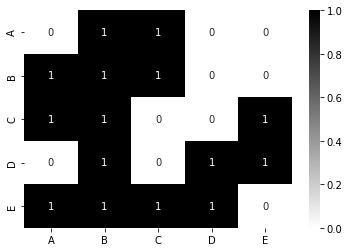

In [ ]:
sns.heatmap(M, cmap='gist_gray_r', annot=True, xticklabels = ['A','B','C','D','E'], yticklabels = ['A','B','C','D','E'])

Considere la matriz propuesta para este inciso como una matriz de adyacencia para un grafo


## Utilice la estructura propuesta para encontrar todos los caminos que llevan de la ciudad A a la ciudad B.

Inserte todas las celdas de código que considere necesarias

# 3.

Existen un numero $n$ de ciudades conectadas por algun numero de vuelos. Usted tiene a su disposicion una lista de listas $flights$ donde $flights[i] = [from_{i} , to_{i}, cost_{i}]$ indicando que hay un vuelo desde la ciudad $from_{i}$ a la ciudad $to_{i}$ con un costo de $cost_{i}$.

Tambien tiene 3 parametros iniciales de tipo entero `source`, `destination` y `num_max_stops`. Para este inciso debe crear uno o varios algoritmos que computen el costo mas bajo para poder ir desde `source` a `destination` con a lo mas `num_max_stops` paradas. Si no existe tal ruta, retornar -1. 

### Example code for better undestanding

In [ ]:
def convert_to_dict(flights: list):
  distances = {}
  for row in flights:
      for i in range(0, len(row)-1, 2):
          key_tuple = (row[0], row[1])
          d = row[2]
          if key_tuple in distances.keys():
              if distances[key_tuple] != d:
                  print("Warning: Found a conflicting distance for {}: {} and "
                        "{}. Using last".format(key_tuple, distances[key_tuple], d))
          distances[key_tuple] = d
  return distances

def create_graph(distances: dict):
  G = nx.DiGraph(directed = True)
  for k, v in distances.items():
      G.add_edge(k[0], k[1], weight=v)
  return G

def plot_graph(G, seed):
  plt.figure(figsize=(4,5))

  pos = nx.spring_layout(G, seed = seed)
  edge_labels = nx.get_edge_attributes(G, "weight")

  nx.draw_networkx(G, pos = pos)
  nx.draw_networkx_edge_labels(G, pos, edge_labels)

  plt.plot()

### Example 1

n = 4

flights = [[0,1,50],[1,2,50],[2,0,50],[1,3,300],[2,3,150]]

source = 0, destination = 3, num_max_stops = 1


Respuesta esperada: 350
Explicacion: Mirar el grafo :)

In [ ]:
flights = [[0,1,50],[1,2,50],[2,0,50],[1,3,300],[2,3,150]]

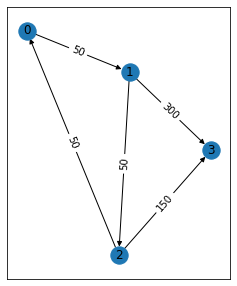

In [ ]:
seed = 1  # Seed random number generators for reproducibility
plot_graph(create_graph(convert_to_dict(flights)), seed)

Inserte todas las celdas de código que considere necesarias

### Example 2

n = 3

flights = [[0,1,50],[1,2,205],[0,2,60]]

source = 0, destination = 2, num_max_stops = 0


Respuesta esperada: 60
Explicacion: Mirar el grafo :)

In [ ]:
flights = [[0,1,50],[1,2,205],[0,2,60]]

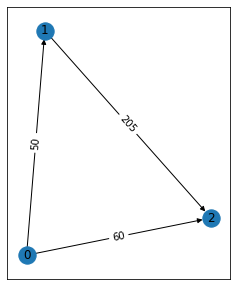

In [ ]:
seed = 60  # Seed random number generators for reproducibility
plot_graph(create_graph(convert_to_dict(flights)), seed)

Inserte todas las celdas de código que considere necesarias

# 4.

Usted tiene a su disposicion una lista de listas `coordinates` que representa coordenadas enteras en un plano 2D, donde $coordinates[i] = [x_i,y_i]$. 

El costo de crear una conexion entre dos puntos $[x_i,y_i]$ y $[x_j,y_j]$ puede ser computado con una metrica de distancia (por ejemplo, distancia euclidiana, distancia manhattan, etc. Para este problema usar la distancia manhattan pero igual, prueben como seria programar otras distancias), usando la distancia manhattan el costo seria:

$$ d = \left | x_i - x_j \right| + \left | y_i - y_j \right | $$

La generalizacion de esta formula es:

$$ D(x, y) = ∑_{i = 1}^{k} \left| x_i - y_i \right| $$

**Nota**: Si quieren intentar en sus casas con otras distancias pueden ver el siguiente link: [distancias](https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa)

Su tarea para este inciso es calcular el minimo costo para conectar todos los puntos. Puede asumir que todos los puntos estan conectados si existe exactamente un solo camino simple para cualquier par de puntos.

Puede asumir que todos los puntos en `coordinates` son distintos.

#### Example 1

coordinates = [[0,0],[2,2],[3,10],[5,2],[7,0]]

Respuesta esperada: 20

In [ ]:
coordinates = np.array([[0,0],[2,2],[3,10],[5,2],[7,0]])

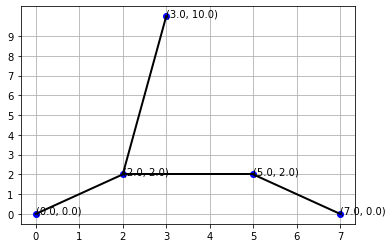

In [ ]:
plt.plot(coordinates[:,0], coordinates[:,1], 'bo')
plt.plot([0, 2], [0, 2], 'k-', lw=2)
plt.plot([2, 3], [2, 10], 'k-', lw=2)
plt.plot([2, 5], [2, 2], 'k-', lw=2)
plt.plot([5, 7], [2, 0], 'k-', lw=2)

for xy in zip(coordinates[:,0], coordinates[:,1]):
   plt.annotate('(%.1f, %.1f)' % xy, xy=xy)

y = np.arange(0, 10, 1)
plt.yticks(y)
plt.grid(True)

plt.show()

Inserte todas las celdas de código que considere necesarias

#### Example 1

coordinates = [[0,0],[3,5],[-2,4],[7,0]]

Respuesta esperada: 19

In [ ]:
coordinates = np.array([[0,0],[3,5],[-2,4],[7,0]])

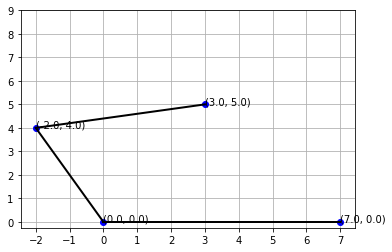

In [ ]:
plt.plot(coordinates[:,0], coordinates[:,1], 'bo')
plt.plot([-2, 3], [4, 5], 'k-', lw=2)
plt.plot([-2, 0], [4, 0], 'k-', lw=2)
plt.plot([0, 7], [0, 0], 'k-', lw=2)

for xy in zip(coordinates[:,0], coordinates[:,1]):
   plt.annotate('(%.1f, %.1f)' % xy, xy=xy)

x = np.arange(-2, 8, 1)
plt.xticks(x)
y = np.arange(0, 10, 1)
plt.yticks(y)

plt.grid(True)

plt.show()

Inserte todas las celdas de código que considere necesarias

# 5.

Revisar el siguiente link: [5](https://leetcode.com/problems/find-the-city-with-the-smallest-number-of-neighbors-at-a-threshold-distance/)



Inserte todas las celdas de código que considere necesarias